In [ ]:
# https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html#example-plot-tipping-problem-newapi-py


In [1]:
import skfuzzy as skf
import skfuzzy.control as skc
import numpy as np


def build_dummy_model() -> tuple:
    distance_max = 20
    velocity_max = 10
    speed_min = -10
    speed_max = 10
    _distance = skc.Antecedent(np.arange(0, distance_max + 1, 1), 'distance')
    _velocity = skc.Antecedent(np.arange(0, velocity_max + 1, 1), 'velocity')
    _speed = skc.Consequent(np.arange(speed_min, speed_max + 1, 1), 'speed')

    _distance['low'] = skf.trimf(_distance.universe, [0, 0, 7])
    _distance['medium'] = skf.trimf(_distance.universe, [3, 10, 17])
    _distance['high'] = skf.trimf(_distance.universe, [13, 20, 20])

    _velocity['low'] = skf.trimf(_velocity.universe, [0, 0, 4])
    _velocity['medium'] = skf.trimf(_velocity.universe, [2, 5, 8])
    _velocity['high'] = skf.trimf(_velocity.universe, [6, 10, 10])

    _speed['low'] = skf.trimf(_speed.universe, [-10, -10, -4])
    _speed['medium'] = skf.trimf(_speed.universe, [-7, 0, 7])
    _speed['high'] = skf.trimf(_speed.universe, [4, 10, 10])

    return _distance, _velocity, _speed


distance, velocity, speed = build_dummy_model()

/media/isshin/2b550c8a-059f-4ca5-8b78-7211cfc683fc/isshin/Projekty/SI1/WORKING/venv/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/media/isshin/2b550c8a-059f-4ca5-8b78-7211cfc683fc/isshin/Projekty/SI1/WORKING/venv/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/media/isshin/2b550c8a-059f-4ca5-8b78-7211cfc683fc/isshin/Projekty/SI1/WORKING/venv/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


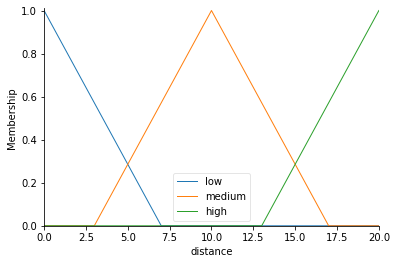

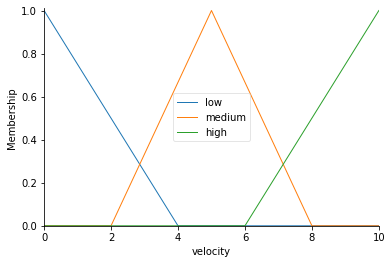

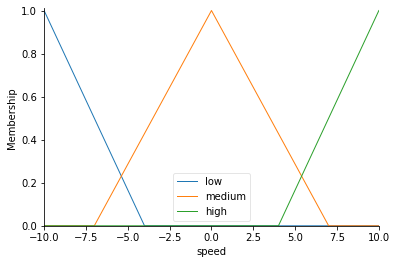

In [2]:
distance.view()
velocity.view()
speed.view()

In [4]:
def print_rules(fuzzy_rules : list):
    for i in fuzzy_rules:
        to_str = 'IF ' + str(i.antecedent) + ' THEN ' + str(i.consequent)
        print(to_str)


def build_dummy_rules() -> list:
    ling_vars = ['low', 'medium', 'high']
    rules_list = []

    for i in range(0, len(ling_vars)):
        for j in range(0, len(ling_vars)):
            prev_1 = ling_vars[i]
            prev_2 = ling_vars[j]
            next_var = ling_vars[1]

            if i > j:
                next_var = ling_vars[0]

            if i < j:
                next_var = ling_vars[2]

            rule = skc.Rule(velocity[prev_1] & distance[prev_2], speed[next_var])
            rules_list.append(rule)

    return rules_list


dummy_rules = build_dummy_rules()
print_rules(dummy_rules)

IF velocity[low] AND distance[low] THEN [speed[medium]]
IF velocity[low] AND distance[medium] THEN [speed[high]]
IF velocity[low] AND distance[high] THEN [speed[high]]
IF velocity[medium] AND distance[low] THEN [speed[low]]
IF velocity[medium] AND distance[medium] THEN [speed[medium]]
IF velocity[medium] AND distance[high] THEN [speed[high]]
IF velocity[high] AND distance[low] THEN [speed[low]]
IF velocity[high] AND distance[medium] THEN [speed[low]]
IF velocity[high] AND distance[high] THEN [speed[medium]]


-7.666666666666667


/media/isshin/2b550c8a-059f-4ca5-8b78-7211cfc683fc/isshin/Projekty/SI1/WORKING/venv/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


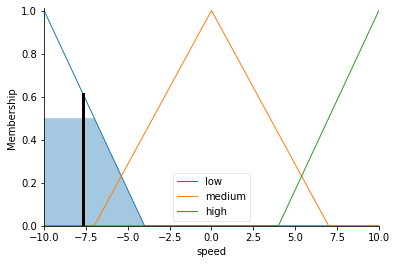

In [5]:
def build_dummy_driver(rules : list) -> skc.ControlSystemSimulation:
    speed_system = skc.ControlSystem(rules)
    return skc.ControlSystemSimulation(speed_system)


dummy_driver = build_dummy_driver(dummy_rules)
dummy_driver.input['distance'] = 3
dummy_driver.input['velocity'] = 8
dummy_driver.compute()
print(dummy_driver.output['speed'])
speed.view(sim=dummy_driver)

In [50]:
def build_preservative_model() -> tuple:
    distance_max = 8
    velocity_min = -10
    velocity_max = 10
    speed_min = -10
    speed_max = 10
    _distance = skc.Antecedent(np.arange(0, distance_max + 1, 1), 'distance')
    _velocity = skc.Antecedent(np.arange(velocity_min, velocity_max + 1, 1), 'velocity')
    _speed = skc.Consequent(np.arange(speed_min, speed_max + 1, 1), 'speed')

    _distance['low'] = skf.trimf(_distance.universe, [0, 0, 4])
    _distance['medium'] = skf.trimf(_distance.universe, [2, 4, 6])
    _distance['high'] = skf.trimf(_distance.universe, [4, 8, 8])

    _velocity['low'] = skf.trimf(_velocity.universe, [-10, -10, 0])
    _velocity['medium'] = skf.trimf(_velocity.universe, [-5, 0, 5])
    _velocity['high'] = skf.trimf(_velocity.universe, [0, 10, 10])

    _speed['low'] = skf.trimf(_speed.universe, [-10, -10, 0])
    _speed['medium'] = skf.trimf(_speed.universe, [-5, 0, 5])
    _speed['high'] = skf.trimf(_speed.universe, [0, 10, 10])

    return _distance, _velocity, _speed


distance, velocity, speed = build_preservative_model()

/media/isshin/2b550c8a-059f-4ca5-8b78-7211cfc683fc/isshin/Projekty/SI1/WORKING/venv/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/media/isshin/2b550c8a-059f-4ca5-8b78-7211cfc683fc/isshin/Projekty/SI1/WORKING/venv/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/media/isshin/2b550c8a-059f-4ca5-8b78-7211cfc683fc/isshin/Projekty/SI1/WORKING/venv/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


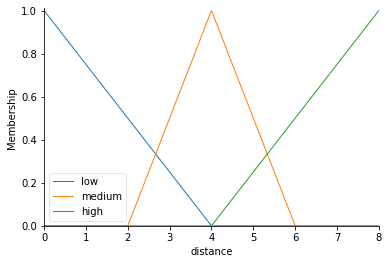

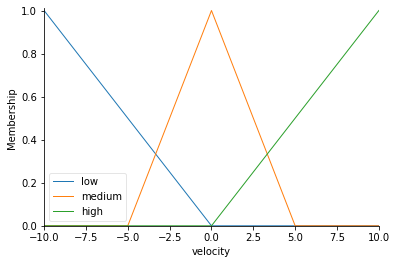

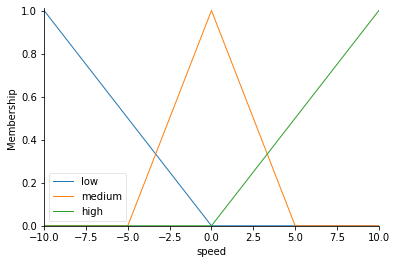

In [51]:
distance.view()
velocity.view()
speed.view()

In [57]:
def build_preservative_rules() -> list:
    pre_rules = list()
    pre_rules.append(skc.Rule(distance['low'] & velocity['low'], speed['low']))
    pre_rules.append(skc.Rule(distance['medium'] & velocity['low'], speed['medium']))
    pre_rules.append(skc.Rule(distance['high'] & velocity['low'], speed['high']))
    pre_rules.append(skc.Rule(distance['low'] & velocity['medium'], speed['low']))
    pre_rules.append(skc.Rule(distance['medium'] & velocity['medium'], speed['medium']))
    pre_rules.append(skc.Rule(distance['high'] & velocity['medium'], speed['high']))
    pre_rules.append(skc.Rule(distance['low'] & velocity['high'], speed['low']))
    pre_rules.append(skc.Rule(distance['medium'] & velocity['high'], speed['medium']))
    pre_rules.append(skc.Rule(distance['high'] & velocity['high'], speed['high']))
    return pre_rules


preservative_rules = build_preservative_rules()
#print_rules(preservative_rules)

-6.111111111111112


/media/isshin/2b550c8a-059f-4ca5-8b78-7211cfc683fc/isshin/Projekty/SI1/WORKING/venv/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


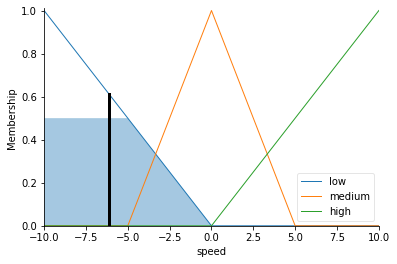

In [58]:
def build_preservative_driver(rules : list) -> skc.ControlSystemSimulation:
    speed_system = skc.ControlSystem(rules)
    return skc.ControlSystemSimulation(speed_system)


preservative_driver = build_preservative_driver(preservative_rules)
preservative_driver.input['distance'] = 2
preservative_driver.input['velocity'] = 6
preservative_driver.compute()
print(preservative_driver.output['speed'])
speed.view(sim=preservative_driver)

In [6]:
import sim as v_rep
import time
from tank import *


def establish_connection_with_v_rep() -> tuple:
    v_rep.simxFinish(-1)
    client_id = v_rep.simxStart('127.0.0.1', 19999, True, True, 5000, 5)

    if client_id != -1:
        state_str = 'OK'
        print ("Connected to remote API server.")
    else:
        state_str = 'ERROR'
        print("Not connected to remote API server.")

    return client_id, state_str

In [7]:
def avoid_collision(driver : skc.ControlSystemSimulation, tank : Tank, dist : float):
    driver.input['distance'] = dist
    driver.input['velocity'] = tank.read_velocity()
    driver.compute()
    speed_value = float(driver.output['speed'])
    tank.forward(speed_value)


def perform_start_action(tank : Tank):
    tank.forward(10)


def perform_simulation(client : int, driver : skc.ControlSystemSimulation, duration_in_seconds = 20):
    tank = Tank(client)
    err_code, ps_handle = v_rep.simxGetObjectHandle(client, "Proximity_sensor", v_rep.simx_opmode_blocking)
    start_time = time.time()
    perform_start_action(tank)

    while ( time.time() - start_time ) < duration_in_seconds:
        err_code, detection_state, detected_point, detected_object_handle, detected_surface_normal_vector = v_rep.simxReadProximitySensor(client, ps_handle, v_rep.simx_opmode_streaming)
        proximity_sensor_distance = np.linalg.norm(detected_point)
        avoid_collision(driver, tank, proximity_sensor_distance)

    v_rep.simxStopSimulation(client, v_rep.simx_opmode_oneshot)

In [65]:
status_id, status_str = establish_connection_with_v_rep()

if status_str == 'OK':
    perform_simulation(status_id, dummy_driver, 60)


Connected to remote API server.


In [64]:
status_id, status_str = establish_connection_with_v_rep()

if status_str == 'OK':
    perform_simulation(status_id, preservative_driver, 60)


Connected to remote API server.


In [63]:
def avoid_collision(driver : skc.ControlSystemSimulation, tank : Tank, dist : float):
    vel = tank.read_velocity()

    if dist < 0.5:
        vel = 0.0
    elif 0.0 < dist < 2.0:
        vel = 1.0
    elif 2.0 < dist < 4.0:
        vel = 4.0
    elif 4.0 < dist < 6.0:
        vel = 8.0
    elif 6.0 < dist < 7.0:
        vel = 9.0
    elif dist > 7.0:
        vel = 10.0

    tank.forward(vel)


status_id, status_str = establish_connection_with_v_rep()

if status_str == 'OK':
    perform_simulation(status_id, None, 60)

Connected to remote API server.


In [1]:
!jupyter nbconvert --to html Exercise1.ipynb
!wkhtmltopdf Exercise1.html Exercise1.pdf

[NbConvertApp] Converting notebook Exercise1.ipynb to html
[NbConvertApp] Writing 496413 bytes to Exercise1.html
Loading page (1/2)
Printing pages (2/2)                                               
Done                                                           


In [2]:
!jupyter nbconvert --to pdf Exercise1.ipynb

[NbConvertApp] Converting notebook Exercise1.ipynb to pdf
[NbConvertApp] Support files will be in Exercise1_files/
[NbConvertApp] Making directory ./Exercise1_files
[NbConvertApp] Making directory ./Exercise1_files
[NbConvertApp] Making directory ./Exercise1_files
[NbConvertApp] Making directory ./Exercise1_files
[NbConvertApp] Making directory ./Exercise1_files
[NbConvertApp] Making directory ./Exercise1_files
[NbConvertApp] Making directory ./Exercise1_files
[NbConvertApp] Making directory ./Exercise1_files
[NbConvertApp] Writing 55666 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', './notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 165635 bytes to Exercise1.pdf
